# Simple Reinforcement Learning with Tensorflow: Part 0 - Q-Tables

In this iPython notebook we implement a Q-Table algorithm that solves the FrozenLake problem. For more details see original tutorial on [Medium](https://medium.com/@awjuliani/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0).

In [218]:
%matplotlib inline

import gym
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

### Load the environment

In [219]:
env = gym.make('FrozenLake-v0')

### Implement Q-Table learning algorithm

$$Q(s,a) := \left( 1 - \gamma \right) Q(s,a) + \gamma \left( r + \lambda \max_{a \in A} Q(s_{next}) \right)$$

In [244]:
# Initialize observation_space x action_space Q table with zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])
# Set learning parameters
lr = .8
y = .95
num_episodes = 2000
# Create lists to contain total rewards and steps per episode
R = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    reward_sum = 0
    # The Q-Table learning algorithm for a single game
    while True:
        old_state = state
        # Choose an action from Q table using epsilon greedy
        action = np.argmax(Q[old_state, :] + np.random.randn(1, env.action_space.n) / (i + 1))
        # Get new state and reward from environment
        state, reward, done, info = env.step(action)
        # Update Q-Table with new knowledge
        Q[old_state, action] = (1 - lr) * Q[old_state, action] + lr * (reward + y * np.max(Q[state, :]))
        reward_sum += reward
        # Check if game is finished
        if done:
            break
    R.append(reward_sum)

## How score varies over time?

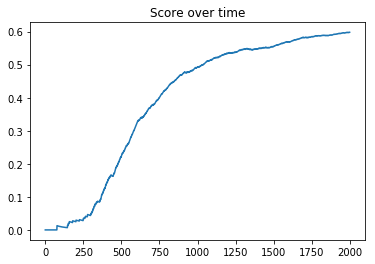

In [245]:
plt.plot(np.cumsum(R) / np.arange(1, num_episodes + 1))
plt.title('Score over time')
plt.show()

## Final Q-Table Values

In [214]:
print(" 0 S  1 F  2 F  3 F\n 4 F  5 H  6 F  7 H\n 8 F  9 F 10 F 11 H\n12 H 13 F 14 F 15 G")
pd.DataFrame(Q, columns=['left', 'down', 'right', 'up']).style.background_gradient(axis=1)

 0 S  1 F  2 F  3 F
 4 F  5 H  6 F  7 H
 8 F  9 F 10 F 11 H
12 H 13 F 14 F 15 G


,left,down,right,up
0,0.125288,0.0024449,0.00172559,0.00249783
1,0.000300569,0.000104121,0.000709044,0.234896
2,0.211092,0.000884882,0.000975865,0.0010518
3,0.000334386,0.000207831,0.000155236,0.00100256
4,0.188968,0.00133601,0.000842856,0.000836063
5,0,0,0,0
6,0.0922108,2.62197e-08,6.45119e-06,1.7235e-09
7,0,0,0,0
8,0.000944381,0.000904573,0.000142144,0.365372
9,0.000543497,0.539551,0.000166591,0


## Let's play a single game

In [215]:
state = env.reset()
env.render()
while True:
    action = np.argmax(Q[state, :])
    state, reward, done, info = env.step(action)
    env.render()
    if done:
        break


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG